In [1]:
import os

# Get current working directory
print("Current Directory:", os.getcwd())


Current Directory: C:\Users\DJ COMPUTERS\CT_TASK_2_NLP


# SENTIMENT ANALYSIS USING NLP

#### - ADITYA KUMAR ROY

In [5]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to C:\Users\DJ
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### LOADING THE DATA

In [8]:
data = pd.read_csv(r"C:\Users\DJ COMPUTERS\OneDrive\Desktop\Jupyter\Dataset-SA.csv")
data.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,highly recommended,very good product,positive
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,worth the money,very good,positive


In [10]:
data.shape

(205052, 6)

In [12]:
## checking for na values
data.isna().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [14]:
## filtering and removing na or null observations
df = data.dropna()

### DATA PRE-PROCESSING

In [17]:
# Display first few rows
df[['Summary', 'Sentiment']].head()

,Summary,Sentiment
0,great cooler excellent air flow and for this p...,positive
1,best budget 2 fit cooler nice cooling,positive
2,the quality is good but the power of air is de...,positive
3,very bad product its a only a fan,negative
4,ok ok product,neutral


In [19]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)              # Remove special characters
    text = text.lower()                                  # Lowercase
    text = text.strip()
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['cleaned_review'] = df['Summary'].astype(str).apply(clean_text)

# Preview cleaned text
df[['Summary', 'cleaned_review', 'Sentiment']].head()


C:\Users\DJ COMPUTERS\AppData\Local\Temp\ipykernel_3372\1532925901.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_review'] = df['Summary'].astype(str).apply(clean_text)


,Summary,cleaned_review,Sentiment
0,great cooler excellent air flow and for this p...,great cooler excellent air flow price amazing ...,positive
1,best budget 2 fit cooler nice cooling,best budget fit cooler nice cooling,positive
2,the quality is good but the power of air is de...,quality good power air decent,positive
3,very bad product its a only a fan,bad product fan,negative
4,ok ok product,ok ok product,neutral


In [20]:
# Splitting X and Y
X = df['cleaned_review']
y = df['Sentiment']


In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Vectorizing the data to feed into the model
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


### MODEL TRAINING

In [39]:
from sklearn.model_selection import GridSearchCV

# Model training with hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['saga', 'lbfgs'],  # saga and lbfgs support multinomial loss
    'penalty': ['l2'],
    'multi_class': ['multinomial']  # suitable for 3+ classes
}

# Initialize model
lr = LogisticRegression(max_iter=500)

# Grid search with cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

C:\Users\DJ COMPUTERS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}


### MODEL EVALUATION 

Accuracy: 91.66481871604391

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.71      0.76      4877
     neutral       0.75      0.41      0.53      1695
    positive       0.93      0.98      0.96     29504

    accuracy                           0.92     36076
   macro avg       0.84      0.70      0.75     36076
weighted avg       0.91      0.92      0.91     36076



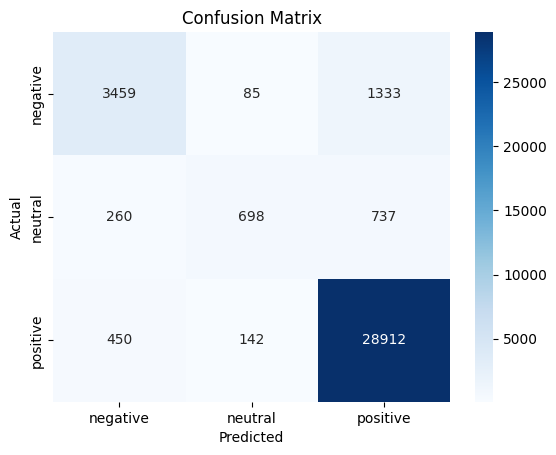

In [42]:
# prediction using the trained model
y_pred = best_model.predict(X_test_tfidf)

# evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### PREDICTION 

In [45]:
# testing for custom reviews
def predict_sentiment(review):
    review_clean = clean_text(review)
    review_tfidf = vectorizer.transform([review_clean])
    prediction = best_model.predict(review_tfidf)
    return prediction[0]

# Example
example_1 = "This cooler is amazing and works perfectly!"       
example_2 = "The product is terrible, waste of money."          
example_3 = "The product is okay, nothing special or bad."      

print("Example 1:", predict_sentiment(example_1))
print("Example 2:", predict_sentiment(example_2))
print("Example 3:", predict_sentiment(example_3))


Example 1: positive
Example 2: negative
Example 3: negative


### SAVING THE MODEL FOR DEPLOYMENT

In [50]:
import pickle

# Save model and vectorizer
with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
